In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Load the dataset
df = pd.read_csv('adult_with_headers (1).csv')

In [8]:
# Step 2: Basic Data Exploration
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
# Data types and basic info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Note: In this dataset, missing values are represented as '?' rather than NaN
print("\nUnique values in each column to identify '?' markers:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()}")

Missing Values:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

Unique values in each column to identify '?' markers:
workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital_status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transpor

In [11]:
# Replace '?' with NaN for proper handling
df.replace('?', np.nan, inplace=True)

# Now check missing values again
print("Missing Values After Replacing '?':")
print(df.isnull().sum())

Missing Values After Replacing '?':
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [12]:
# Summary statistics for numerical features
print("Numerical Features Summary:")
df.describe()

Numerical Features Summary:


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [13]:
# Step 3: Handle Missing Values
# For numerical columns, use mean imputation
numerical_cols = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_cols = ['workclass', 'education', 'marital_status', 'occupation',
                   'relationship', 'race', 'sex', 'native_country']

# Impute numerical columns
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])

# For categorical columns with few missing values, use mode imputation
# For columns with many missing values, consider creating a 'missing' category
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Missing values after imputation:")
print(df.isnull().sum())

Missing values after imputation:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [14]:
# Step 4: Scaling Techniques

# a. Standard Scaling (Z-score normalization)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numerical_cols] = standard_scaler.fit_transform(df[numerical_cols])

print("After Standard Scaling (first 5 rows):")
df_standard[numerical_cols].head()

After Standard Scaling (first 5 rows):


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429


In [15]:
# b. Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numerical_cols] = minmax_scaler.fit_transform(df[numerical_cols])

print("After Min-Max Scaling (first 5 rows):")
df_minmax[numerical_cols].head()

After Min-Max Scaling (first 5 rows):


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,0.301370,0.044302,0.800000,0.02174,0.0,0.397959
1,0.452055,0.048238,0.800000,0.00000,0.0,0.122449
2,0.287671,0.138113,0.533333,0.00000,0.0,0.397959
3,0.493151,0.151068,0.400000,0.00000,0.0,0.397959
4,0.150685,0.221488,0.800000,0.00000,0.0,0.397959


In [16]:
# Discussion: When to use each scaling technique
print("""
SCALING TECHNIQUES - WHEN TO USE:

Standard Scaling (Z-score normalization):
- Preferred when data follows normal distribution
- Useful for algorithms that assume normally distributed data (SVM, Linear Regression, PCA)
- Preserves outliers but centers data around mean with unit variance

Min-Max Scaling:
- Preferred when you need bounded values (e.g., neural networks expecting 0-1)
- Useful when distribution is not normal
- Sensitive to outliers
- Good for algorithms that don't assume specific distributions (KNN, Neural Networks)
""")


SCALING TECHNIQUES - WHEN TO USE:

Standard Scaling (Z-score normalization):
- Preferred when data follows normal distribution
- Useful for algorithms that assume normally distributed data (SVM, Linear Regression, PCA)
- Preserves outliers but centers data around mean with unit variance

Min-Max Scaling:
- Preferred when you need bounded values (e.g., neural networks expecting 0-1)
- Useful when distribution is not normal
- Sensitive to outliers
- Good for algorithms that don't assume specific distributions (KNN, Neural Networks)



In [17]:
# Step 5: Encoding Techniques

# Identify categorical variables with less than 5 categories
print("Categorical variables and their unique value counts:")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} unique values")

Categorical variables and their unique value counts:
workclass: 9 unique values
education: 16 unique values
marital_status: 7 unique values
occupation: 15 unique values
relationship: 6 unique values
race: 5 unique values
sex: 2 unique values
native_country: 42 unique values


In [18]:
# One-Hot Encoding for variables with less than 5 categories
small_cat_cols = [col for col in categorical_cols if df[col].nunique() < 5]
large_cat_cols = [col for col in categorical_cols if df[col].nunique() >= 5]

print("Variables for One-Hot Encoding (<5 categories):", small_cat_cols)
print("Variables for Label Encoding (≥5 categories):", large_cat_cols)

Variables for One-Hot Encoding (<5 categories): ['sex']
Variables for Label Encoding (≥5 categories): ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'native_country']


In [19]:
# Apply One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=small_cat_cols, drop_first=True)
print("Shape after One-Hot Encoding:", df_encoded.shape)
df_encoded.head()

Shape after One-Hot Encoding: (32561, 15)


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,capital_gain,capital_loss,hours_per_week,native_country,income,sex_ Male
0,39.0,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,2174.0,0.0,40.0,United-States,<=50K,True
1,50.0,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,0.0,0.0,13.0,United-States,<=50K,True
2,38.0,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,0.0,0.0,40.0,United-States,<=50K,True
3,53.0,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,0.0,0.0,40.0,United-States,<=50K,True
4,28.0,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0.0,0.0,40.0,Cuba,<=50K,False


In [20]:
# Apply Label Encoding for variables with more than 5 categories
label_encoder = LabelEncoder()
for col in large_cat_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

print("After Label Encoding:")
df_encoded[large_cat_cols].head()

After Label Encoding:


,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5


In [21]:
# Encode the target variable
df_encoded['income'] = label_encoder.fit_transform(df_encoded['income'])
print("Target variable encoding:")
print("<=50K -> 0, >50K -> 1")

Target variable encoding:
<=50K -> 0, >50K -> 1


In [22]:
# Discussion: Encoding Pros and Cons
print("""
ENCODING TECHNIQUES - PROS AND CONS:

One-Hot Encoding:
PROS:
- Doesn't assume ordinal relationship between categories
- Prevents model from assuming false relationships
- Works well with most machine learning algorithms

CONS:
- Can create high dimensionality (curse of dimensionality)
- May create sparse datasets
- Not suitable for tree-based algorithms with high cardinality

Label Encoding:
PROS:
- Preserves dimensionality
- Good for tree-based algorithms
- Efficient for high cardinality features

CONS:
- Implies ordinal relationship where none exists
- May mislead algorithms into thinking categories have order
- Not suitable for linear models with nominal data
""")


ENCODING TECHNIQUES - PROS AND CONS:

One-Hot Encoding:
PROS:
- Doesn't assume ordinal relationship between categories
- Prevents model from assuming false relationships
- Works well with most machine learning algorithms

CONS:
- Can create high dimensionality (curse of dimensionality)
- May create sparse datasets
- Not suitable for tree-based algorithms with high cardinality

Label Encoding:
PROS:
- Preserves dimensionality
- Good for tree-based algorithms
- Efficient for high cardinality features

CONS:
- Implies ordinal relationship where none exists
- May mislead algorithms into thinking categories have order
- Not suitable for linear models with nominal data



In [23]:
# Step 6: Feature Engineering

# Create new feature 1: Age Group
def create_age_group(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Senior'

df_encoded['age_group'] = df['age'].apply(create_age_group)
print("Age Group distribution:")
print(df_encoded['age_group'].value_counts())

Age Group distribution:
age_group
Middle    15788
Young      9711
Senior     7062
Name: count, dtype: int64


In [24]:
# Create new feature 2: Work Hours Category
def work_hours_category(hours):
    if hours < 30:
        return 'Part-time'
    elif hours < 50:
        return 'Full-time'
    else:
        return 'Overtime'

df_encoded['work_hours_category'] = df['hours_per_week'].apply(work_hours_category)
print("Work Hours Category distribution:")
print(df_encoded['work_hours_category'].value_counts())

Work Hours Category distribution:
work_hours_category
Full-time    22003
Overtime      6462
Part-time     4096
Name: count, dtype: int64


In [25]:
# Create new feature 3: Capital Flow (gain - loss)
df_encoded['capital_flow'] = df['capital_gain'] - df['capital_loss']
print("Capital Flow statistics:")
print(df_encoded['capital_flow'].describe())

Capital Flow statistics:
count    32561.000000
mean       990.345014
std       7408.986951
min      -4356.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_flow, dtype: float64


In [26]:
# Rationale for new features
print("""
FEATURE ENGINEERING RATIONALE:

1. Age Group:
- Simplifies age into meaningful categories
- Captures life stage information that might affect income
- Reduces noise in age data

2. Work Hours Category:
- Groups hours into meaningful employment types
- Part-time vs full-time vs overtime may correlate with income levels
- Creates clearer patterns for the model to learn

3. Capital Flow:
- Combines capital gain and loss into a single metric
- Net capital flow might be more predictive than separate features
- Simplifies the relationship for the model
""")


FEATURE ENGINEERING RATIONALE:

1. Age Group:
- Simplifies age into meaningful categories
- Captures life stage information that might affect income
- Reduces noise in age data

2. Work Hours Category:
- Groups hours into meaningful employment types
- Part-time vs full-time vs overtime may correlate with income levels
- Creates clearer patterns for the model to learn

3. Capital Flow:
- Combines capital gain and loss into a single metric
- Net capital flow might be more predictive than separate features
- Simplifies the relationship for the model



In [27]:
# Step 7: Handle Skewed Numerical Features

# Check skewness of numerical features
print("Skewness of numerical features:")
for col in numerical_cols:
    skewness = df[col].skew()
    print(f"{col}: {skewness:.2f}")

Skewness of numerical features:
age: 0.56
fnlwgt: 1.45
education_num: -0.31
capital_gain: 11.95
capital_loss: 4.59
hours_per_week: 0.23


In [28]:
# Apply log transformation to highly skewed features
# Capital gain and capital loss are highly skewed
df_encoded['log_capital_gain'] = np.log1p(df['capital_gain'])  # log1p to handle zeros
df_encoded['log_capital_loss'] = np.log1p(df['capital_loss'])

print("Skewness after log transformation:")
print(f"Original capital_gain skew: {df['capital_gain'].skew():.2f}")
print(f"Transformed capital_gain skew: {df_encoded['log_capital_gain'].skew():.2f}")

Skewness after log transformation:
Original capital_gain skew: 11.95
Transformed capital_gain skew: 3.10


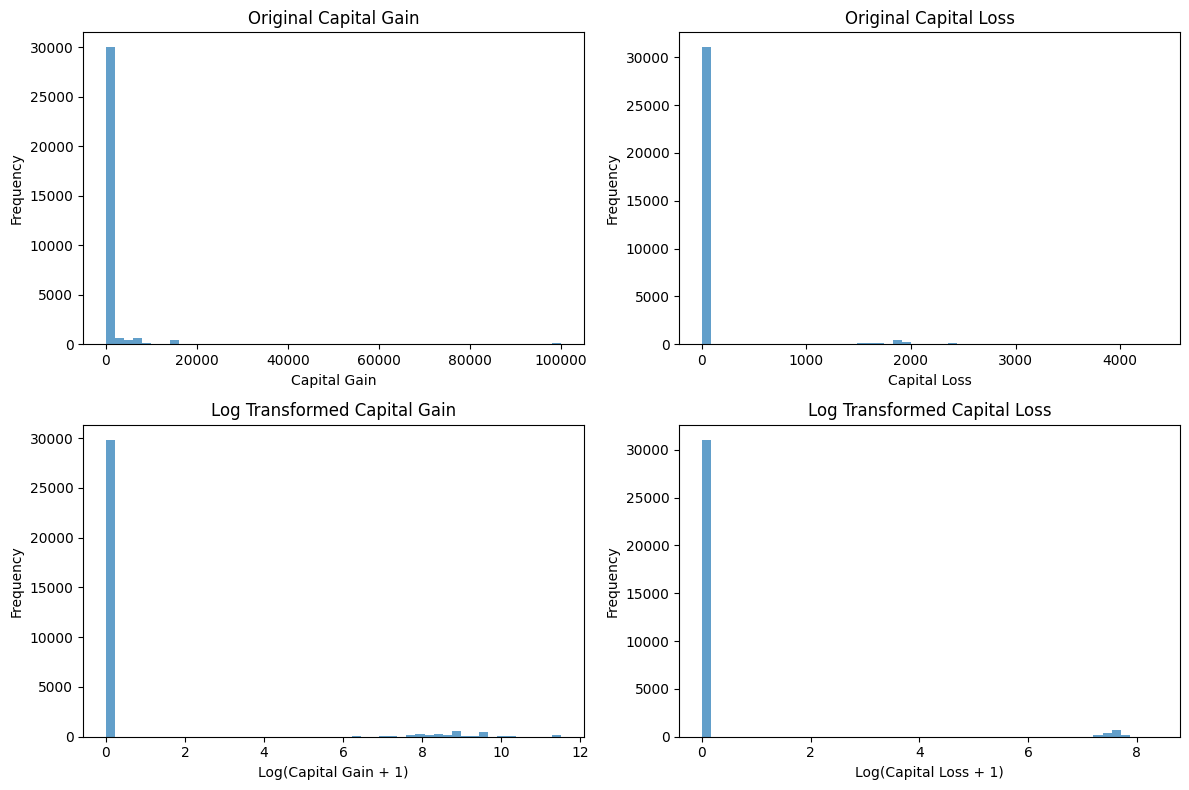

In [29]:
# Visualize the transformation
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Before transformation
axes[0,0].hist(df['capital_gain'], bins=50, alpha=0.7)
axes[0,0].set_title('Original Capital Gain')
axes[0,0].set_xlabel('Capital Gain')
axes[0,0].set_ylabel('Frequency')

axes[0,1].hist(df['capital_loss'], bins=50, alpha=0.7)
axes[0,1].set_title('Original Capital Loss')
axes[0,1].set_xlabel('Capital Loss')
axes[0,1].set_ylabel('Frequency')

# After transformation
axes[1,0].hist(df_encoded['log_capital_gain'], bins=50, alpha=0.7)
axes[1,0].set_title('Log Transformed Capital Gain')
axes[1,0].set_xlabel('Log(Capital Gain + 1)')
axes[1,0].set_ylabel('Frequency')

axes[1,1].hist(df_encoded['log_capital_loss'], bins=50, alpha=0.7)
axes[1,1].set_title('Log Transformed Capital Loss')
axes[1,1].set_xlabel('Log(Capital Loss + 1)')
axes[1,1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [30]:
# Justification for log transformation
print("""
JUSTIFICATION FOR LOG TRANSFORMATION:

Why transform capital_gain and capital_loss:
1. High Skewness: Both features are extremely right-skewed (skewness > 10)
2. Sparse Data: Most values are 0, with few large values
3. Algorithm Performance: Many algorithms perform better with normally distributed data
4. Outlier Impact: Reduces the influence of extreme values

Benefits:
- Makes distribution more normal
- Reduces the impact of outliers
- Improves performance of linear models
- Helps with gradient-based optimization
""")


JUSTIFICATION FOR LOG TRANSFORMATION:

Why transform capital_gain and capital_loss:
1. High Skewness: Both features are extremely right-skewed (skewness > 10)
2. Sparse Data: Most values are 0, with few large values
3. Algorithm Performance: Many algorithms perform better with normally distributed data
4. Outlier Impact: Reduces the influence of extreme values

Benefits:
- Makes distribution more normal
- Reduces the impact of outliers
- Improves performance of linear models
- Helps with gradient-based optimization



In [31]:
# Final dataset overview
print("FINAL DATASET OVERVIEW")
print("="*50)
print(f"Original shape: {df.shape}")
print(f"Final shape: {df_encoded.shape}")
print(f"Number of features created: {df_encoded.shape[1] - df.shape[1] + 1}")  # +1 for target encoding

print("\nData Types:")
print(df_encoded.dtypes.value_counts())

print("\nMissing Values in Final Dataset:")
print(df_encoded.isnull().sum().sum())  # Should be 0

FINAL DATASET OVERVIEW
Original shape: (32561, 15)
Final shape: (32561, 20)
Number of features created: 6

Data Types:
float64    9
int64      8
object     2
bool       1
Name: count, dtype: int64

Missing Values in Final Dataset:
0


In [32]:
# Save the processed dataset
df_encoded.to_csv('adult_processed.csv', index=False)
print("Processed dataset saved as 'adult_processed.csv'")

Processed dataset saved as 'adult_processed.csv'
